In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FuelConsumption.csv")
data=data[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
data.rename(columns={'FUELCONSUMPTION_COMB_MPG':'comubstion', 'CO2EMISSIONS':'emission'},inplace=True)

In [3]:
data.head()

,comubstion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


In [4]:
data.shape

(1067, 2)

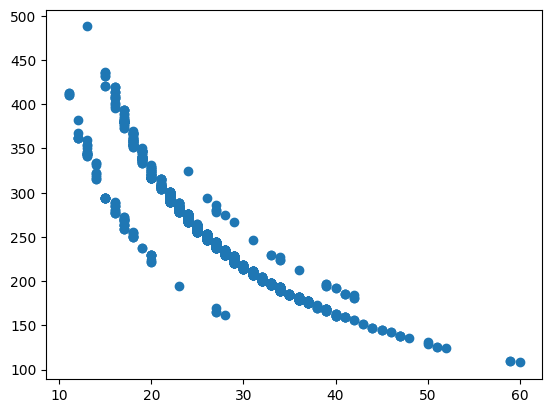

In [5]:
plt.scatter(data.comubstion, data.emission)

In [6]:
X = data.iloc[:,0:1].values
y = data.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [9]:
L.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = L.predict(X_test)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score ",r2_score(y_test, y_pred))
print("MSE ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score  0.8261445883060663
MSE  27.0911073218799


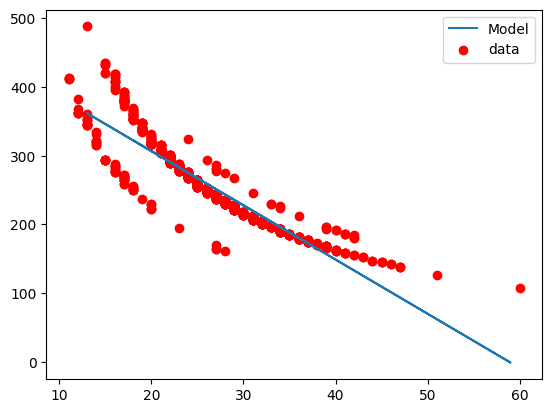

In [14]:
plt.plot(X_test, L.predict(X_test), label="Model")
plt.scatter(X_train, y_train, label="data", color="r")
plt.legend()
plt.show()

# Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [16]:
X_poly = poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(853, 3)


array([[  1.,  22., 484.],
       [  1.,  19., 361.],
       [  1.,  27., 729.],
       ...,
       [  1.,  24., 576.],
       [  1.,  21., 441.],
       [  1.,  25., 625.]])

In [17]:
L1 = LinearRegression()
L1.fit(X_poly, y_train)

LinearRegression()

In [18]:
X_test_poly = poly.fit_transform(X_test)

In [21]:
y_pred = L1.predict(X_test_poly)

In [22]:
print("R2 score ",r2_score(y_test, y_pred))
print("MSE ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score  0.8843365867808958
MSE  22.096864469091773


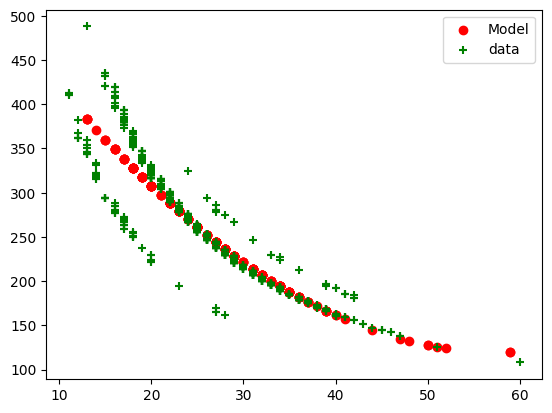

In [23]:
plt.scatter(X_test, y_pred, label="Model", color="r")
plt.scatter(X_train, y_train, label="data", marker='+', color="g")
plt.legend()
plt.show()

In [30]:
def polynomialRegression(X,y,k=7):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

  poly = PolynomialFeatures(degree=k)
  X_poly = poly.fit_transform(X_train)
  lr = LinearRegression()
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)
  
  return training_score, test_score

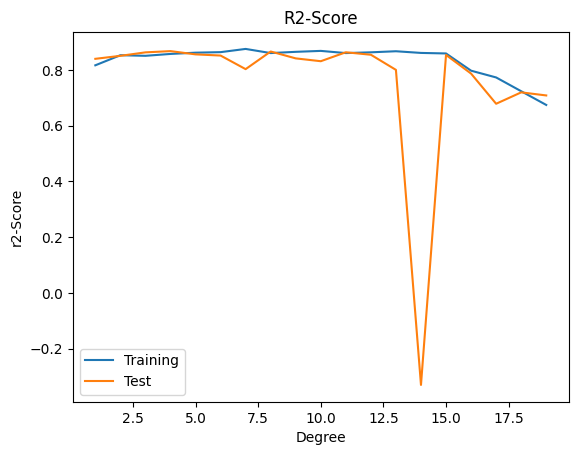

In [31]:
train=[]
test=[]
for i in range(1,20):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("R2-Score")
plt.show()